In [1]:
from sim.system_models.vehicle_systems.tire_model import TireModel
from sim.model_parameters.cars.lady_luck import LadyLuck

import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
tire_model = TireModel()
lady_luck = LadyLuck()
tire_model.lat_coeffs = lady_luck.rear_tire_coeff_Fy
tire_model.long_coeffs = lady_luck.rear_tire_coeff_Fx

slip_ratios = np.linspace(-0.15, 0.15, 31)
slip_angles = np.linspace(-15 * np.pi / 180, 15 * np.pi / 180, 31)
normal_loads = np.array([300])
colors = np.array(["r", "g", "b"])

SR_dict = dict()
SA_dict = dict()

for slip_ratio in slip_ratios:
    SR_dict[slip_ratio] = []

for slip_angle in slip_angles:
    SA_dict[slip_angle] = []

C:\Users\rober\AppData\Local\Temp\ipykernel_32096\977086491.py:16: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, W)


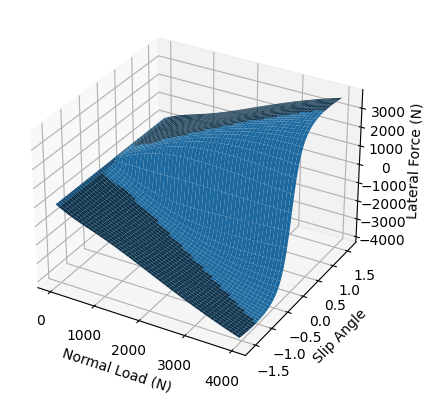

In [11]:
tire_model.lat_coeffs = [3.06312013e-01, -4.84039800e-04, 9.28662043e+00, 7.26482752e+02, 1.37727265e+03, 4.12679421e-02, 2.53429368e-05, 1.01054136e+00, 1.46808723e-04, -1.59143742e-01, -1.29418581e-01, -1.00903302e-01, 9.57798247e+01, 2.27490918e-05, -1.83997391e-02, -1.13901618e-03, -1.56217480e-02, -4.89395709e-04]

model_x_data = np.linspace(0, 4000, 1000)
model_y_data = np.linspace(-np.pi / 2, np.pi / 2, 1000)

X, Y = np.meshgrid(model_x_data, model_y_data)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

W = tire_model._lat_pacejka([X, Y, 0])

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(X, Y, W)

ax.set_xlabel('Normal Load (N)')
ax.set_ylabel('Slip Angle')
ax.set_zlabel('Lateral Force (N)')

plt.show()

C:\Users\rober\AppData\Local\Temp\ipykernel_32096\2675869427.py:16: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, W)


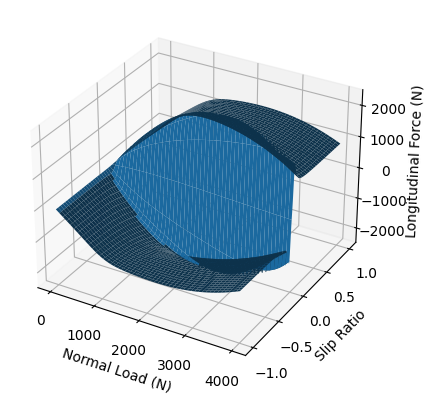

In [12]:
# tire_model.long_coeffs = [0.46024966176377113, 4000.509873697152, 1097.1712081460967, 202.18848632159495, 100.8812198037175, -0.2557010431649166, 0.3066955241461764, 0.011822770671297778, -1.9521015799737094, 0, 0, 0, 0, 0]

model_x_data = np.linspace(0, 4000, 1000)
model_y_data = np.linspace(-1, 1, 1000)

X, Y = np.meshgrid(model_x_data, model_y_data)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

W = tire_model._long_pacejka([X, Y])

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(X, Y, W)

ax.set_xlabel('Normal Load (N)')
ax.set_ylabel('Slip Ratio')
ax.set_zlabel('Longitudinal Force (N)')

plt.show()

In [5]:
inclination_angle = 0

outputs = []
for load in normal_loads:
    for slip_angle in slip_angles:
        for slip_ratio in slip_ratios:
            comstock_output = tire_model.get_comstock_forces(SA = slip_angle, SR = slip_ratio, FZ = load, IA = inclination_angle * np.pi / 180)
            SR_dict[slip_ratio].append([comstock_output[0] / load, comstock_output[1] / load])
            SA_dict[slip_angle].append([comstock_output[0] / load, comstock_output[1] / load])

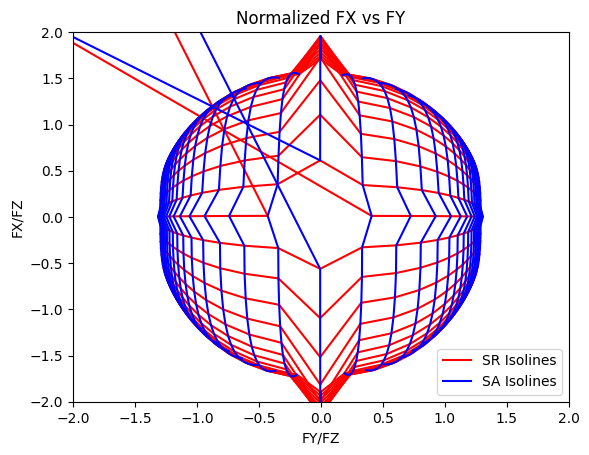

In [6]:
for slip_ratio in SR_dict:
    forces = [[], []]
    slip = slip_ratio
    for force in SR_dict[slip_ratio]:
        forces[0].append(force[0])
        forces[1].append(force[1])
    
    plt.plot(forces[1], forces[0], 'r')
    
for slip_angle in SA_dict:
    forces = [[], []]
    slip = slip_angle
    for force in SA_dict[slip_angle]:
        forces[0].append(force[0])
        forces[1].append(force[1])
    
    plt.plot(forces[1], forces[0], 'b')
    
plt.xlabel("FY/FZ")
plt.ylabel("FX/FZ")
plt.title("Normalized FX vs FY")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
SR_line = lines.Line2D([0], [0], color='red', label='SR Isolines')
SA_line = lines.Line2D([0], [0], color='blue', label='SA Isolines')
plt.legend(handles=[SR_line, SA_line], loc = 4)
plt.show()

In [7]:
# Setup

model_SA_data = np.linspace(-np.pi / 2, np.pi / 2, 1000)
model_SR_data = np.linspace(-1, 1, 1000)

SA, SR = np.meshgrid(model_SA_data, model_SR_data)

FX = tire_model.get_comstock_forces(SA, SR, 700, 0)[0]
FY = tire_model.get_comstock_forces(SA, SR, 700, 0)[1]

# FX2 = tire_model._get_comstock_forces(SA, SR, 500, 0 * np.pi / 180)[0]
# FY2 = tire_model._get_comstock_forces(SA, SR, 500, 0 * np.pi / 180)[1]

# FX3 = tire_model._get_comstock_forces(SA, SR, 500, -5 * np.pi / 180)[0]
# FY3 = tire_model._get_comstock_forces(SA, SR, 500, -5 * np.pi / 180)[1]

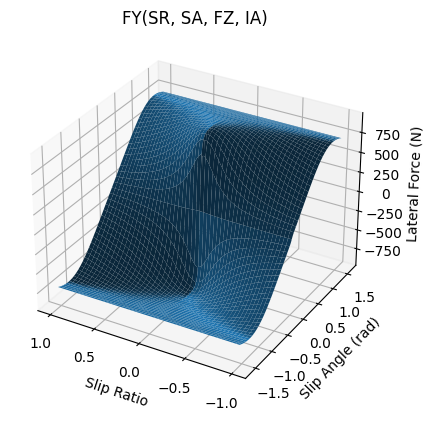

In [8]:
# Lat

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(SR, SA, FY)
# ax.plot_surface(SR, SA, FY2)
# ax.plot_surface(SR, SA, FY3)

ax.set_xlabel('Slip Ratio')
ax.set_ylabel('Slip Angle (rad)')
ax.set_zlabel('Lateral Force (N)')
ax.set_title('FY(SR, SA, FZ, IA)')

ax.invert_xaxis()

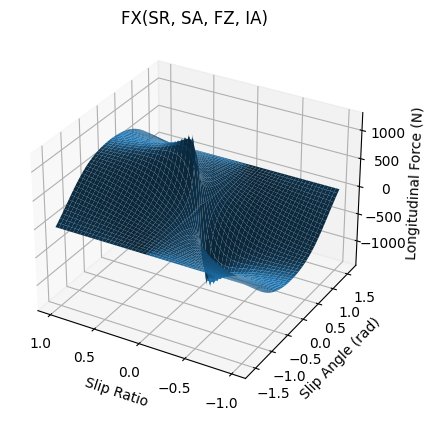

In [9]:
# Long

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(SR, SA, FX)
# ax.plot_surface(SR, SA, FX2)

ax.set_xlabel('Slip Ratio')
ax.set_ylabel('Slip Angle (rad)')
ax.set_zlabel('Longitudinal Force (N)')
ax.set_title('FX(SR, SA, FZ, IA)')
ax.invert_xaxis()

In [10]:
SA = 90
SR = 0

forces = tire_model.get_comstock_forces(SA * 180 / np.pi, SR / 100, 647.316, 0, max_force = 1000000)

print(f"FX: {round(forces[0])}, FY: {round(forces[1])}")

FX: 0, FY: 1462
